**Exercise:** Something like the class size paradox appears if you survey children and ask how many children are in their family. Families with many children are more likely to appear in your sample, and families with no children have no chance to be in the sample.

Use the NSFG respondent variable `numkdhh` to construct the actual distribution for the number of children under 18 in the respondents' households.

Now compute the biased distribution we would see if we surveyed the children and asked them how many children under 18 (including themselves) are in their household.

Plot the actual and biased distributions, and compute their means.

## My solution

In this problem I will make a step plot for the accurate distribution of children under 18 in the household, and will overlay another step plot on it to compare with what we would observe if we received the children's answers as respondents

In [34]:
import nsfg
import thinkstats2
import matplotlib.pyplot as plt

%matplotlib inline
import numpy as np
import pandas as pd
import probability
import thinkplot

In [57]:
df = nsfg.ReadFemResp()

In [73]:
pmf = thinkstats2.Pmf(df['numkdhh'], label='correct')
pmf

Pmf({0: 0.466178202276593, 1: 0.21405207379301322, 2: 0.19625801386889966, 3: 0.08713855815779145, 4: 0.025644380478869556, 5: 0.01072877142483318})

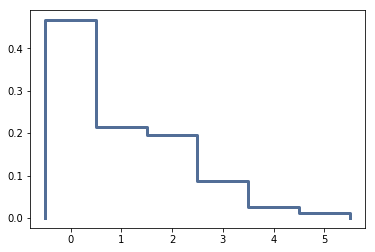

In [75]:
# This plot contains the accurate step plot of children in the household
thinkplot.Pmf(pmf)

In [71]:
def BiasPmf(pmf, label):
    new_pmf = pmf.Copy(label=label)

    for x, p in pmf.Items():
        new_pmf.Mult(x, x)
        
    new_pmf.Normalize()
    return new_pmf

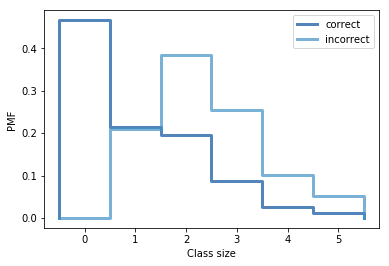

In [74]:
biased_pmf = BiasPmf(pmf, label='incorrect')
thinkplot.PrePlot(2)
thinkplot.Pmfs([pmf, biased_pmf])
thinkplot.Config(xlabel='Class size', ylabel='PMF')

In the above distribution, we see that the households with 0 children had no responses - because there are no children to respond to the survey. In addition, households with multiple children are overrepresented, because each marginal child increases the children in the household more than linearly, but closer to exponentially